In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
flights=pd.read_csv("flights.csv",low_memory=False)

In [4]:
airports=pd.read_csv("airports.csv")

In [5]:
airlines=pd.read_csv("airlines.csv")

In [3]:
flights.head(5)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            LAX                 PBI                   10      ...         
2            SFO                 CLT                   20      ...         
3            LAX                 MIA                   20      ...         
4            SEA                 ANC                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0         0          0                  NaN   
1         741.0           -9.0         0          0                  NaN   
2         811.0            5.0         0          0                  NaN   
3         756.0           -9.0         0          0                  NaN   
4         259.0          -21.0         0          0                  NaN   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               NaN             NaN            NaN                  NaN   
1               NaN             NaN            NaN                  NaN   
2               NaN             NaN            NaN                  NaN   
3               NaN             NaN            NaN                  NaN   
4               NaN             NaN            NaN                  NaN   

   WEATHER_DELAY  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 31 columns]

In [6]:
airports.head(5)

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [7]:
airlines.head(5)

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

In [ ]:
As we are interested in delay so negative delays does not make sense all negative delays are set to zero.

In [139]:
# if sampling will be required
flights_sample=flights.sample(frac=0.1, replace=False)

In [140]:
flights_sample.head(10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
4774346  2015     10   25            7      UA            218      N215UA   
5736513  2015     12   26            6      EV           5536      N846AS   
4167685  2015      9   17            4      AA           1912      N538UW   
4844893  2015     10   30            5      AA           1084      N3HXAA   
2961076  2015      7    5            7      NK            116      N527NK   
5225440  2015     11   23            1      UA           2005      N466UA   
4425201  2015     10    3            6      DL           1687      N913DN   
3764019  2015      8   22            6      VX            713      N527VA   
3586760  2015      8   11            2      DL           1284      N331NB   
2582759  2015      6   12            5      EV           2670      N684JW   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
4774346          12173               13930                 1600   
5736513            ATL                 TYS                 1726   
4167685            RDU                 CLT                  700   
4844893          13303               12953                  607   
2961076            DEN                 DFW                 1520   
5225440            ORD                 SMF                 1221   
4425201          14679               13487                 1230   
3764019            DAL                 SFO                  800   
3586760            SLC                 DEN                 1351   
2582759            DFW                 TYR                 1700   

             ...        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
4774346      ...               433.0          -34.0         0          0   
5736513      ...              1959.0          100.0         0          0   
4167685      ...               816.0           12.0         0          0   
4844893      ...               844.0          -16.0         0          0   
2961076      ...              1829.0           17.0         0          0   
5225440      ...              1437.0          -20.0         0          0   
4425201      ...              1755.0          -15.0         0          0   
3764019      ...               923.0          -12.0         0          0   
3586760      ...              1510.0           -9.0         0          0   
2582759      ...              1756.0            3.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
4774346                  NaN               NaN             NaN            NaN   
5736513                  NaN               0.0             0.0            0.0   
4167685                  NaN               NaN             NaN            NaN   
4844893                  NaN               NaN             NaN            NaN   
2961076                  NaN               0.0             0.0           17.0   
5225440                  NaN               NaN             NaN            NaN   
4425201                  NaN               NaN             NaN            NaN   
3764019                  NaN               NaN             NaN            NaN   
3586760                  NaN               NaN             NaN            NaN   
2582759                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
4774346                  NaN            NaN  
5736513                100.0            0.0  
4167685                  NaN            NaN  
4844893                  NaN            NaN  
2961076                  0.0            0.0  
5225440                  NaN            NaN  
4425201                  NaN            NaN  
3764019                  NaN            NaN  
3586760                  NaN            NaN  
2582759                  NaN            NaN  

[10 rows x 31 columns]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
flights.shape
flights.head(2)
flights.loc[flights['ARRIVAL_DELAY'] < 0, 'ARRIVAL_DELAY'] = 0
%matplotlib inline

In [9]:
flights.shape

(5819079, 31)

In [10]:
flights['ARRIVAL_DELAY'].describe()

count    5.714008e+06
mean     1.209368e+01
std      3.574761e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

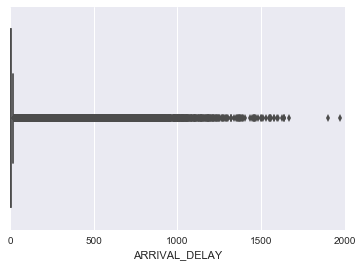

In [11]:
sns.boxplot(flights.ARRIVAL_DELAY)

In [ ]:
From this we can say that despite of many big delays the average delay is very low.

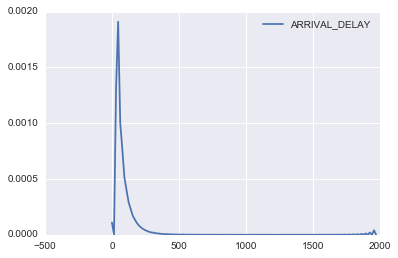

In [12]:
sns.kdeplot(flights.ARRIVAL_DELAY)

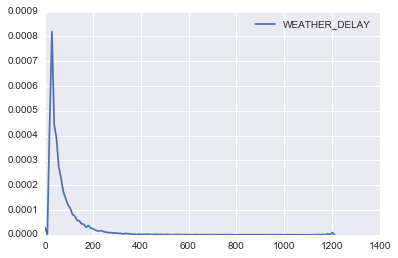

In [13]:
sns.kdeplot(flights.WEATHER_DELAY)

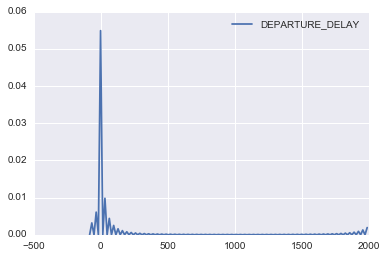

In [14]:
sns.kdeplot(flights.DEPARTURE_DELAY)

In [15]:
flights.AIRLINE.describe()

count     5819079
unique         14
top            WN
freq      1261855
Name: AIRLINE, dtype: object

In [16]:
flights['AIRLINE'].value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [ ]:
A flight delay is when an airline flight takes off and/or lands later than its scheduled time.
The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time.
A cancellation occurs when the airline does not operate the flight at all for a certain reason. (Source : Wikipedia )

In [19]:
print (flights['ARRIVAL_DELAY'][flights['ARRIVAL_DELAY'] >= 15].count())
print (flights.shape[0] - flights.AIRLINE_DELAY.isnull().sum().sum())

1063439
1063439


In [ ]:
After Executing this we see that both numbers are same so we can say that this data follows Federal Aviation Administration (FAA)
rule.so those flights which has delay of more than 15 minutes are only been considered for details like WEATHER_DELAY,
AIRLINE_DELAY etc.

In [21]:
''' % of delayed airlines w.r.t their total no of flights '''
per_delay=[]
airlines=flights['AIRLINE'].unique()
print airlines
for airline in airlines:
    total_airline=flights['AIRLINE'][(flights['AIRLINE'] == airline)].value_counts()
    delayed_airline=flights['ARRIVAL_DELAY'][(flights['ARRIVAL_DELAY'] >= 15) & (flights['AIRLINE'] ==airline)].count()
    per_delay.append(delayed_airline/total_airline*100)
print (per_delay)


['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
[AS    12.956104
Name: AIRLINE, dtype: float64, AA    17.945161
Name: AIRLINE, dtype: float64, US    18.392673
Name: AIRLINE, dtype: float64, DL    13.474776
Name: AIRLINE, dtype: float64, NK    29.154278
Name: AIRLINE, dtype: float64, UA    20.305862
Name: AIRLINE, dtype: float64, HA    11.299035
Name: AIRLINE, dtype: float64, B6    22.158938
Name: AIRLINE, dtype: float64, OO    18.321484
Name: AIRLINE, dtype: float64, EV    19.088879
Name: AIRLINE, dtype: float64, MQ    20.550042
Name: AIRLINE, dtype: float64, F9    25.947862
Name: AIRLINE, dtype: float64, WN    18.752234
Name: AIRLINE, dtype: float64, VX    19.026542
Name: AIRLINE, dtype: float64]


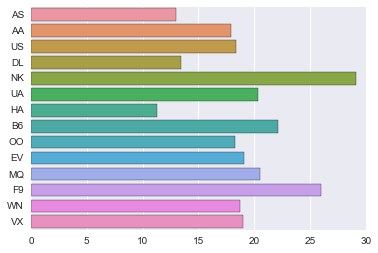

In [22]:
sns.barplot(per_delay,airlines)

In [23]:
'''airline having delay of more than 15 minutes'''
flights['AIRLINE'][(flights['ARRIVAL_DELAY'] >= 15)].value_counts()

WN    236626
AA    130279
DL    118023
EV    109184
OO    107795
UA    104722
MQ     60547
B6     59175
US     36549
NK     34221
F9     23570
AS     22352
VX     11778
HA      8618
Name: AIRLINE, dtype: int64

In [25]:
'''storing more than 15 minutes delay flight in flights_delay'''
flights_delay=flights[(flights['ARRIVAL_DELAY'] >= 15)]
flights_delay.head(5)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
27  2015      1    1            4      NK            597      N528NK   
30  2015      1    1            4      NK            168      N629NK   
35  2015      1    1            4      HA             17      N389HA   
50  2015      1    1            4      B6           1030      N239JB   
52  2015      1    1            4      B6           2134      N307JB   

   ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
27            MSP                 FLL                  115      ...         
30            PHX                 ORD                  125      ...         
35            LAS                 HNL                  145      ...         
50            BQN                 MCO                  307      ...         
52            SJU                 MCO                  400      ...         

    ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
27         607.0           25.0         0          0                  NaN   
30         632.0           43.0         0          0                  NaN   
35         610.0           15.0         0          0                  NaN   
50         520.0           20.0         0          0                  NaN   
52         730.0           85.0         0          0                  NaN   

    AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27              25.0             0.0            0.0                  0.0   
30              43.0             0.0            0.0                  0.0   
35               0.0             0.0           15.0                  0.0   
50              20.0             0.0            0.0                  0.0   
52               0.0             0.0           85.0                  0.0   

    WEATHER_DELAY  
27            0.0  
30            0.0  
35            0.0  
50            0.0  
52            0.0  

[5 rows x 31 columns]

In [26]:
flights_delay.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1063439.0  1.063439e+06  1.063439e+06  1.063439e+06   1.063439e+06   
mean      2015.0  6.234027e+00  1.556726e+01  3.877865e+00   2.192196e+03   
std          0.0  3.411281e+00  8.794511e+00  1.979265e+00   1.784775e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  3.000000e+00  8.000000e+00  2.000000e+00   7.230000e+02   
50%       2015.0  6.000000e+00  1.600000e+01  4.000000e+00   1.667000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  5.000000e+00   3.289000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.320000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         1.063439e+06    1.063439e+06     1.063439e+06  1.063439e+06   
mean          1.467735e+03    1.525514e+03     5.494791e+01  2.072598e+01   
std           4.553922e+02    4.890752e+02     6.721908e+01  1.478739e+01   
min           1.000000e+00    1.000000e+00    -3.200000e+01  1.000000e+00   
25%           1.120000e+03    1.155000e+03     1.700000e+01  1.200000e+01   
50%           1.521000e+03    1.604000e+03     3.700000e+01  1.600000e+01   
75%           1.835000e+03    1.923000e+03     7.000000e+01  2.400000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF      ...        SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count  1.063439e+06      ...             1.063439e+06  1.063439e+06   
mean   1.548499e+03      ...             1.620392e+03  1.576297e+03   
std    4.955822e+02      ...             5.058204e+02  6.108446e+02   
min    1.000000e+00      ...             1.000000e+00  1.000000e+00   
25%    1.211000e+03      ...             1.300000e+03  1.239000e+03   
50%    1.620000e+03      ...             1.715000e+03  1.719000e+03   
75%    1.940000e+03      ...             2.027000e+03  2.044000e+03   
max    2.400000e+03      ...             2.400000e+03  2.400000e+03   

       ARRIVAL_DELAY   DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count   1.063439e+06  1063439.0  1063439.0      1.063439e+06    1.063439e+06   
mean    5.891440e+01        0.0        0.0      1.348057e+01    7.615387e-02   
std     6.425032e+01        0.0        0.0      2.800368e+01    2.143460e+00   
min     1.500000e+01        0.0        0.0      0.000000e+00    0.000000e+00   
25%     2.300000e+01        0.0        0.0      0.000000e+00    0.000000e+00   
50%     3.700000e+01        0.0        0.0      2.000000e+00    0.000000e+00   
75%     7.000000e+01        0.0        0.0      1.800000e+01    0.000000e+00   
max     1.971000e+03        0.0        0.0      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   1.063439e+06         1.063439e+06   1.063439e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  
std     4.816164e+01         4.319702e+01   2.043334e+01  
min     0.000000e+00         0.000000e+00   0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

In [27]:
''' average delay for each AIRLINE wrt to total data '''
avg_delay_totaldata=[]
airlines=flights['AIRLINE'].unique()
print airlines
for airline in airlines:
    AVG_airline=flights['ARRIVAL_DELAY'][(flights['AIRLINE'] == airline)].mean()
    avg_delay_totaldata.append(AVG_airline)
print avg_delay_totaldata


['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
[7.495359865608176, 12.079516365447061, 10.769728610926615, 9.245699347907271, 20.079492677506444, 14.380424293271258, 6.10389132178693, 14.842925943169416, 12.508687375826524, 13.528245053645593, 14.668335778414654, 18.851859251859253, 11.147153540356873, 12.12996342737722]


In [ ]:
Average delay is maximum in case of NK.

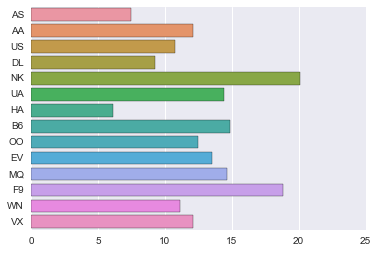

In [28]:
sns.barplot(avg_delay_totaldata,airlines)

In [29]:
''' average delay for each AIRLINE wrt to delayed data (flights_delay)'''
AVG_delay_delaydata=[]
airlines=flights_delay['AIRLINE'].unique()
print airlines
for airline in airlines:
    AVG_delay_delaydata.append(flights_delay['ARRIVAL_DELAY'][(flights_delay['AIRLINE'] == airline)].mean())
print(AVG_delay_delaydata)

['NK' 'HA' 'B6' 'AA' 'US' 'UA' 'DL' 'OO' 'F9' 'EV' 'WN' 'MQ' 'AS' 'VX']
[63.20653984395547, 39.59062427477373, 61.00887198986058, 60.112796383146936, 50.29043202276396, 64.70279406428449, 61.258322530354256, 60.360684632867944, 67.1972422571065, 62.73955890973036, 52.28243726386788, 62.963218656580835, 48.0931012884753, 56.30132450331126]


In [ ]:
HA has significantlly less average delay

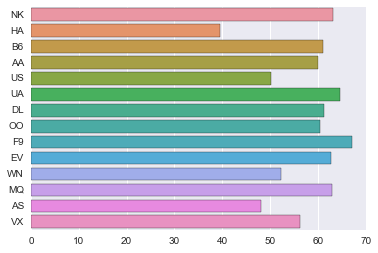

In [30]:
sns.barplot(AVG_delay_delaydata,airlines)

In [31]:
''' percentage of diverted flights wrt different airlines '''
per_diverted=[]
airlines=flights['AIRLINE'].unique()
print airlines
for airline in airlines:
    total_airline=flights['AIRLINE'][(flights['AIRLINE'] == airline)].value_counts()
    diverted_airline=flights['DIVERTED'][(flights['DIVERTED'] ==1) & (flights['AIRLINE'] ==airline)].count()
    per_diverted.append(diverted_airline/total_airline*100)
print (per_diverted)

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
[AS    0.239391
Name: AIRLINE, dtype: float64, AA    0.293395
Name: AIRLINE, dtype: float64, US    0.213874
Name: AIRLINE, dtype: float64, DL    0.203452
Name: AIRLINE, dtype: float64, NK    0.155053
Name: AIRLINE, dtype: float64, UA    0.269137
Name: AIRLINE, dtype: float64, HA    0.078666
Name: AIRLINE, dtype: float64, B6    0.273359
Name: AIRLINE, dtype: float64, OO    0.268376
Name: AIRLINE, dtype: float64, EV    0.348615
Name: AIRLINE, dtype: float64, MQ    0.276956
Name: AIRLINE, dtype: float64, F9    0.17394
Name: AIRLINE, dtype: float64, WN    0.270158
Name: AIRLINE, dtype: float64, VX    0.195467
Name: AIRLINE, dtype: float64]


In [ ]:
Very less no of airlines are diverted in which percentage no of diversions is maximum in case of EV airline aand about 
negligible in case of HA airline.

In [32]:
''' percentage of cancelled flights wrt different airlines '''
per_cancelled=[]
airlines=flights['AIRLINE'].unique()
print airlines
for airline in airlines:
    total_airline=flights['AIRLINE'][(flights['AIRLINE'] == airline)].value_counts()
    cancelled_airline=flights['CANCELLED'][(flights['CANCELLED'] ==1) & (flights['AIRLINE'] ==airline)].count()
    per_cancelled.append(cancelled_airline/total_airline*100)
print (per_cancelled)

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
[AS    0.387779
Name: AIRLINE, dtype: float64, AA    1.504028
Name: AIRLINE, dtype: float64, US    2.04665
Name: AIRLINE, dtype: float64, DL    0.436589
Name: AIRLINE, dtype: float64, NK    1.70729
Name: AIRLINE, dtype: float64, UA    1.274521
Name: AIRLINE, dtype: float64, HA    0.224198
Name: AIRLINE, dtype: float64, B6    1.60121
Name: AIRLINE, dtype: float64, OO    1.692861
Name: AIRLINE, dtype: float64, EV    2.662869
Name: AIRLINE, dtype: float64, MQ    5.099582
Name: AIRLINE, dtype: float64, F9    0.64732
Name: AIRLINE, dtype: float64, WN    1.271382
Name: AIRLINE, dtype: float64, VX    0.86264
Name: AIRLINE, dtype: float64]


In [ ]:
More than 5 % of time MQ airline flights are cancelled.

In [33]:
pd.options.display.max_rows = 4000
flights_delay['ARRIVAL_DELAY'][flights_delay['WEATHER_DELAY']>0].groupby(flights_delay['AIRLINE']).describe()

AIRLINE       
AA       count     9967.000000
         mean        93.609010
         std         89.152607
         min         15.000000
         25%         37.000000
         50%         68.000000
         75%        121.000000
         max       1460.000000
AS       count      867.000000
         mean        65.400231
         std         66.908974
         min         15.000000
         25%         27.000000
         50%         43.000000
         75%         77.000000
         max        820.000000
B6       count     2173.000000
         mean       100.885872
         std         83.899324
         min         15.000000
         25%         40.000000
         50%         75.000000
         75%        138.000000
         max        592.000000
DL       count    11838.000000
         mean        92.253337
         std         99.055574
         min         15.000000
         25%         34.000000
         50%         62.000000
         75%        117.000000
         max       1211.

In [ ]:
Weather Delay is minimum in case of HA airline and Max in case of B6 airline.But weather delay should not be related with
Airline.so we can say that Scheduled Timing of HA is better than others because it is less affected with weather.

In [34]:
flights_delay['ARRIVAL_DELAY'][flights_delay['AIRLINE_DELAY']>0].groupby(flights_delay['AIRLINE']).describe()
flights_delay['ARRIVAL_DELAY'][flights_delay['LATE_AIRCRAFT_DELAY']>0].groupby(flights_delay['AIRLINE']).describe()
flights_delay['ARRIVAL_DELAY'][flights_delay['SECURITY_DELAY']>0].groupby(flights_delay['AIRLINE']).describe()

AIRLINE       
AA       count    731.000000
         mean      45.752394
         std       39.152567
         min       15.000000
         25%       22.000000
         50%       34.000000
         75%       56.000000
         max      470.000000
AS       count    250.000000
         mean      40.036000
         std       33.358264
         min       15.000000
         25%       20.000000
         50%       27.500000
         75%       46.750000
         max      234.000000
B6       count    433.000000
         mean      53.695150
         std       43.851279
         min       15.000000
         25%       25.000000
         50%       41.000000
         75%       66.000000
         max      364.000000
DL       count     58.000000
         mean      80.189655
         std       83.921320
         min       21.000000
         25%       34.000000
         50%       55.000000
         75%       83.250000
         max      450.000000
HA       count     29.000000
         mean      29.724138

In [ ]:
mean delay shows highest in case of weather delay . Security delay is very less

In [ ]:
CORRELATION

In [35]:
np.corrcoef(flights_delay.ARRIVAL_DELAY,flights_delay.DEPARTURE_DELAY)

array([[ 1.        ,  0.95837847],
       [ 0.95837847,  1.        ]])

In [ ]:
As we see the departure delay is highly correlated with the arrival delay, so we estimate that the flights which are late
in Departure are likely to be late in Arrival. Based on delay departure we can estimate the value of arrival delay.

In [36]:
np.corrcoef(flights_delay.ARRIVAL_DELAY,flights_delay.DEPARTURE_DELAY+flights_delay.TAXI_OUT+flights_delay.TAXI_IN)

array([[ 1.        ,  0.98279731],
       [ 0.98279731,  1.        ]])

In [ ]:
After adding taxi out time and taxi in time in departure delay time it is clear that the Arrival delay is very highly
correlated. From Intuition we can say ARRIVAL_DELAY=DEPARTURE_DELAY+ TAXI_IN + TAXI_OUT + Air Time Delay
so Air Time Delay can be considered negligible for flights.

In [ ]:
                                                    RANKING OF AIRPORTS


In [37]:
'''No of flights delayed from a airport'''

airport_delay_count = pd.DataFrame({'delayed_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['ARRIVAL_DELAY'].count()}).reset_index()
airport_delay_count.sort_values("delayed_rate", ascending=False, inplace=True)
print airport_delay_count
'''mean taxi in time for airports'''
taxiin_mean = pd.DataFrame({'taxiin_rate' : flights_delay.groupby(['DESTINATION_AIRPORT'])['TAXI_IN'].mean()}).reset_index()
taxiin_mean.sort_values("taxiin_rate", ascending=False, inplace=True)
print taxiin_mean

'''mean taxi out time for airports'''
taxiout_mean = pd.DataFrame({'taxiout_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['TAXI_OUT'].mean()}).reset_index()
taxiout_mean.sort_values("taxiout_rate", ascending=False, inplace=True)
print taxiout_mean

'''mean security delay for airports'''
security_delay_mean = pd.DataFrame({'security_delay_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['SECURITY_DELAY'].mean()}).reset_index()
security_delay_mean.sort_values("security_delay_rate", ascending=False, inplace=True)
print security_delay_mean

'''mean weather delay for airports'''
weather_delay_mean = pd.DataFrame({'weather_delay_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['WEATHER_DELAY'].mean()}).reset_index()
weather_delay_mean.sort_values("weather_delay_rate", ascending=False, inplace=True)
print weather_delay_mean
'''no of cancellations from airport'''
cancelled_airport_count = pd.DataFrame({'cancellation_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['CANCELLED'].count()}).reset_index()
cancelled_airport_count.sort_values("cancellation_rate", ascending=False, inplace=True)
print cancelled_airport_count
'''no of diversions from airport'''
diverted_airport_count = pd.DataFrame({'diversion_rate' : flights_delay.groupby(['ORIGIN_AIRPORT'])['DIVERTED'].count()}).reset_index()
diverted_airport_count.sort_values("diversion_rate", ascending=False, inplace=True)
print diverted_airport_count

'''airport traffic'''
airport_traffic = pd.DataFrame({'air_traffic' : flights.groupby(['ORIGIN_AIRPORT'])['ARRIVAL_DELAY'].count()}).reset_index()
airport_traffic.sort_values("air_traffic", ascending=False, inplace=True)
print airport_traffic

    ORIGIN_AIRPORT  delayed_rate
531            ORD         66663
323            ATL         56462
389            DFW         50478
388            DEN         43331
479            LAX         40281
454            IAH         30690
581            SFO         29534
542            PHX         27427
477            LAS         27225
485            LGA         22709
496            MCO         22349
342            BOS         21363
409            EWR         21163
369            CLT         20623
469            JFK         20260
354            BWI         19049
396            DTW         18956
580            SEA         18554
519            MSP         18171
498            MDW         17273
506            MIA         15785
541            PHL         14173
417            FLL         13712
384            DAL         13176
589            SLC         13086
387            DCA         13081
571            SAN         12270
606            TPA         11395
446            HOU         11138
597       

In [ ]:
Security Delay is only significant on Airport ADK and  10165 . ORD airport has highest cancellation and diverted rate.Weather
delay is very high in case of airports 11111,12891 .so we can say that weather of these airports are good for flights.

In [84]:
airport_rank_1 = pd.merge(airport_delay_count,taxiout_mean,on='ORIGIN_AIRPORT')
airport_rank_2=  pd.merge(security_delay_mean,weather_delay_mean,on='ORIGIN_AIRPORT')
airport_rank3=   pd.merge(cancelled_airport_count, diverted_airport_count,on='ORIGIN_AIRPORT')
airport_rank4= pd.merge(airport_rank_1,airport_rank_2,on='ORIGIN_AIRPORT')
airport_rank4=airport_rank4.merge(airport_rank3,on='ORIGIN_AIRPORT')
airport_rank4=airport_rank4.merge(airport_traffic,on='ORIGIN_AIRPORT')
airport_rank=pd.merge(airport_rank4,taxiin_mean,left_on='ORIGIN_AIRPORT',right_on='DESTINATION_AIRPORT')
airport_rank

ORIGIN_AIRPORT  delayed_rate  taxiout_rate  security_delay_rate  \
0              ORD         66663     25.798299             0.040457   
1              ATL         56462     22.335217             0.023627   
2              DFW         50478     21.249752             0.113000   
3              DEN         43331     21.175209             0.020632   
4              LAX         40281     19.305653             0.079814   
5              IAH         30690     21.988302             0.078332   
6              SFO         29534     20.900251             0.060371   
7              PHX         27427     16.980712             0.218434   
8              LAS         27225     17.392874             0.038714   
9              LGA         22709     36.139768             0.024396   
10             MCO         22349     18.398810             0.085015   
11             BOS         21363     26.601133             0.097692   
12             EWR         21163     26.559940             0.080282   
13             CLT         20623     24.794889             0.263541   
14             JFK         20260     36.592498             0.290326   
15             BWI         19049     17.997795             0.155441   
16             DTW         18956     24.531916             0.061722   
17             SEA         18554     19.546405             0.092056   
18             MSP         18171     23.770954             0.035276   
19             MDW         17273     16.807561             0.024779   
20             MIA         15785     22.146215             0.163066   
21             PHL         14173     30.884216             0.104988   
22             FLL         13712     18.646368             0.138784   
23             DAL         13176     13.845553             0.031648   
24             SLC         13086     22.496714             0.053951   
25             DCA         13081     28.037535             0.072395   
26             SAN         12270     15.940098             0.108639   
27             TPA         11395     14.749100             0.019921   
28             HOU         11138     11.962381             0.048303   
29             STL          8673     13.644760             0.039087   
30             OAK          8582     11.814495             0.059194   
31             BNA          8427     15.197223             0.033820   
32             AUS          7153     15.335384             0.041801   
33             IAD          7011     25.814149             0.008130   
34             SJC          6769     13.961590             0.027478   
35             SMF          6562     13.378848             0.018897   
36             MSY          6473     13.317473             0.165148   
37             MCI          6460     14.984675             0.060372   
38             PDX          6382     13.849107             0.040426   
39             CLE          5790     18.109326             0.063040   
40             RDU          5716     20.135934             0.096046   
41             SNA          5438     13.250644             0.014527   
42             MKE          4991     18.945101             0.017832   
43             RSW          4851     15.098536             0.030715   
44             PBI          4818     16.529265             0.272935   
45             HNL          4639     18.256736             0.029963   
46             SAT          4458     14.041947             0.030058   
47             SJU          4308     14.815692             0.146936   
48             CMH          4282     18.126109             0.030360   
49             IND          4080     17.212255             0.048039   
50             CVG          3790     19.205541             0.017678   
51           13930          3650     25.896712             0.023836   
52             PIT          3439     19.665019             0.004362   
53             ABQ          3417     14.498976             0.081943   
54             ONT          2991     12.500167             0.237713   
55           10397          

In [85]:
airport_rank=airport_rank.drop('DESTINATION_AIRPORT',1)


In [86]:
airport_rank


ORIGIN_AIRPORT  delayed_rate  taxiout_rate  security_delay_rate  \
0              ORD         66663     25.798299             0.040457   
1              ATL         56462     22.335217             0.023627   
2              DFW         50478     21.249752             0.113000   
3              DEN         43331     21.175209             0.020632   
4              LAX         40281     19.305653             0.079814   
5              IAH         30690     21.988302             0.078332   
6              SFO         29534     20.900251             0.060371   
7              PHX         27427     16.980712             0.218434   
8              LAS         27225     17.392874             0.038714   
9              LGA         22709     36.139768             0.024396   
10             MCO         22349     18.398810             0.085015   
11             BOS         21363     26.601133             0.097692   
12             EWR         21163     26.559940             0.080282   
13             CLT         20623     24.794889             0.263541   
14             JFK         20260     36.592498             0.290326   
15             BWI         19049     17.997795             0.155441   
16             DTW         18956     24.531916             0.061722   
17             SEA         18554     19.546405             0.092056   
18             MSP         18171     23.770954             0.035276   
19             MDW         17273     16.807561             0.024779   
20             MIA         15785     22.146215             0.163066   
21             PHL         14173     30.884216             0.104988   
22             FLL         13712     18.646368             0.138784   
23             DAL         13176     13.845553             0.031648   
24             SLC         13086     22.496714             0.053951   
25             DCA         13081     28.037535             0.072395   
26             SAN         12270     15.940098             0.108639   
27             TPA         11395     14.749100             0.019921   
28             HOU         11138     11.962381             0.048303   
29             STL          8673     13.644760             0.039087   
30             OAK          8582     11.814495             0.059194   
31             BNA          8427     15.197223             0.033820   
32             AUS          7153     15.335384             0.041801   
33             IAD          7011     25.814149             0.008130   
34             SJC          6769     13.961590             0.027478   
35             SMF          6562     13.378848             0.018897   
36             MSY          6473     13.317473             0.165148   
37             MCI          6460     14.984675             0.060372   
38             PDX          6382     13.849107             0.040426   
39             CLE          5790     18.109326             0.063040   
40             RDU          5716     20.135934             0.096046   
41             SNA          5438     13.250644             0.014527   
42             MKE          4991     18.945101             0.017832   
43             RSW          4851     15.098536             0.030715   
44             PBI          4818     16.529265             0.272935   
45             HNL          4639     18.256736             0.029963   
46             SAT          4458     14.041947             0.030058   
47             SJU          4308     14.815692             0.146936   
48             CMH          4282     18.126109             0.030360   
49             IND          4080     17.212255             0.048039   
50             CVG          3790     19.205541             0.017678   
51           13930          3650     25.896712             0.023836   
52             PIT          3439     19.665019             0.004362   
53             ABQ          3417     14.498976             0.081943   
54             ONT          2991     12.500167             0.237713   
55           10397          

In [87]:
airport_rank.rename(columns={'ORIGIN_AIRPORT': 'AIRPORT'}, inplace=True)

In [88]:
airport_rank

AIRPORT  delayed_rate  taxiout_rate  security_delay_rate  \
0       ORD         66663     25.798299             0.040457   
1       ATL         56462     22.335217             0.023627   
2       DFW         50478     21.249752             0.113000   
3       DEN         43331     21.175209             0.020632   
4       LAX         40281     19.305653             0.079814   
5       IAH         30690     21.988302             0.078332   
6       SFO         29534     20.900251             0.060371   
7       PHX         27427     16.980712             0.218434   
8       LAS         27225     17.392874             0.038714   
9       LGA         22709     36.139768             0.024396   
10      MCO         22349     18.398810             0.085015   
11      BOS         21363     26.601133             0.097692   
12      EWR         21163     26.559940             0.080282   
13      CLT         20623     24.794889             0.263541   
14      JFK         20260     36.592498             0.290326   
15      BWI         19049     17.997795             0.155441   
16      DTW         18956     24.531916             0.061722   
17      SEA         18554     19.546405             0.092056   
18      MSP         18171     23.770954             0.035276   
19      MDW         17273     16.807561             0.024779   
20      MIA         15785     22.146215             0.163066   
21      PHL         14173     30.884216             0.104988   
22      FLL         13712     18.646368             0.138784   
23      DAL         13176     13.845553             0.031648   
24      SLC         13086     22.496714             0.053951   
25      DCA         13081     28.037535             0.072395   
26      SAN         12270     15.940098             0.108639   
27      TPA         11395     14.749100             0.019921   
28      HOU         11138     11.962381             0.048303   
29      STL          8673     13.644760             0.039087   
30      OAK          8582     11.814495             0.059194   
31      BNA          8427     15.197223             0.033820   
32      AUS          7153     15.335384             0.041801   
33      IAD          7011     25.814149             0.008130   
34      SJC          6769     13.961590             0.027478   
35      SMF          6562     13.378848             0.018897   
36      MSY          6473     13.317473             0.165148   
37      MCI          6460     14.984675             0.060372   
38      PDX          6382     13.849107             0.040426   
39      CLE          5790     18.109326             0.063040   
40      RDU          5716     20.135934             0.096046   
41      SNA          5438     13.250644             0.014527   
42      MKE          4991     18.945101             0.017832   
43      RSW          4851     15.098536             0.030715   
44      PBI          4818     16.529265             0.272935   
45      HNL          4639     18.256736             0.029963   
46      SAT          4458     14.041947             0.030058   
47      SJU          4308     14.815692             0.146936   
48      CMH          4282     18.126109             0.030360   
49      IND          4080     17.212255             0.048039   
50      CVG          3790     19.205541             0.017678   
51    13930          3650     25.896712             0.023836   
52      PIT          3439     19.665019             0.004362   
53      ABQ          3417     14.498976             0.081943   
54      ONT          2991     12.500167             0.237713   
55    10397          2946     20.287169             0.065513   
56      BDL          2909     19.100378             0.036439   
57      JAX          2892     16.731328             0.046335   
58      RIC          2784     21.536997             0.021193   
59      OKC          2775     16.899820             0.012973   
60      OMA          2761     17.797899             0.006882   
61    11298          2760     24.721

In [89]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
airport_rank['delayed_rate']= min_max_scaler.fit_transform(airport_rank['delayed_rate'])
airport_rank['taxiout_rate']= min_max_scaler.fit_transform(airport_rank['taxiout_rate'])
airport_rank['security_delay_rate']= min_max_scaler.fit_transform(airport_rank['security_delay_rate'])
airport_rank['weather_delay_rate']= min_max_scaler.fit_transform(airport_rank['weather_delay_rate'])
airport_rank['taxiin_rate']= min_max_scaler.fit_transform(airport_rank['taxiin_rate'])
airport_rank['air_traffic']= min_max_scaler.fit_transform(airport_rank['air_traffic'])
airport_rank['cancellation_rate']= min_max_scaler.fit_transform(airport_rank['cancellation_rate'])
airport_rank['diversion_rate']= min_max_scaler.fit_transform(airport_rank['diversion_rate'])
airport_rank

AIRPORT  delayed_rate  taxiout_rate  security_delay_rate  \
0       ORD      1.000000      0.555128             0.001790   
1       ATL      0.846974      0.465566             0.001045   
2       DFW      0.757208      0.437494             0.005000   
3       DEN      0.649995      0.435566             0.000913   
4       LAX      0.604242      0.387215             0.003532   
5       IAH      0.460367      0.456594             0.003466   
6       SFO      0.443026      0.428455             0.002671   
7       PHX      0.411419      0.327087             0.009665   
8       LAS      0.408389      0.337747             0.001713   
9       LGA      0.340644      0.822580             0.001079   
10      MCO      0.335243      0.363762             0.003762   
11      BOS      0.320452      0.575891             0.004323   
12      EWR      0.317452      0.574826             0.003552   
13      CLT      0.309352      0.529178             0.011661   
14      JFK      0.303906      0.834289             0.012846   
15      BWI      0.285740      0.353391             0.006878   
16      DTW      0.284345      0.522377             0.002731   
17      SEA      0.278314      0.393442             0.004073   
18      MSP      0.272569      0.502697             0.001561   
19      MDW      0.259098      0.322609             0.001096   
20      MIA      0.236777      0.460678             0.007215   
21      PHL      0.212595      0.686661             0.004646   
22      FLL      0.205679      0.370165             0.006141   
23      DAL      0.197639      0.246006             0.001400   
24      SLC      0.196289      0.469743             0.002387   
25      DCA      0.196214      0.613040             0.003203   
26      SAN      0.184048      0.300175             0.004807   
27      TPA      0.170922      0.269373             0.000881   
28      HOU      0.167067      0.197303             0.002137   
29      STL      0.130089      0.240813             0.001730   
30      OAK      0.128724      0.193478             0.002619   
31      BNA      0.126399      0.280963             0.001496   
32      AUS      0.107288      0.284536             0.001850   
33      IAD      0.105157      0.555538             0.000360   
34      SJC      0.101527      0.249007             0.001216   
35      SMF      0.098422      0.233936             0.000836   
36      MSY      0.097087      0.232348             0.007307   
37      MCI      0.096892      0.275466             0.002671   
38      PDX      0.095722      0.246098             0.001789   
39      CLE      0.086841      0.356276             0.002789   
40      RDU      0.085731      0.408688             0.004250   
41      SNA      0.081561      0.230620             0.000643   
42      MKE      0.074855      0.377891             0.000789   
43      RSW      0.072755      0.278410             0.001359   
44      PBI      0.072260      0.315412             0.012077   
45      HNL      0.069575      0.360088             0.001326   
46      SAT      0.066860      0.251085             0.001330   
47      SJU      0.064610      0.271095             0.006502   
48      CMH      0.064219      0.356710             0.001343   
49      IND      0.061189      0.333076             0.002126   
50      CVG      0.056839      0.384626             0.000782   
51    13930      0.054739      0.557674             0.001055   
52      PIT      0.051574      0.396509             0.000193   
53      ABQ      0.051244      0.262905             0.003626   
54      ONT      0.044853      0.211211             0.010518   
55    10397      0.044178      0.412599             0.002899   
56      BDL      0.043623      0.381906             0.001612   
57      JAX      0.043368      0.320638             0.002050   
58      RIC      0.041748      0.444922             0.000938   
59      OKC      0.041613      0.324995             0.000574   
60      OMA      0.041403      0.348222             0.000304   
61    11298      0.041388      0.527

In [90]:
airport_rank['airport_score']=1/(airport_rank['delayed_rate']+airport_rank['taxiout_rate']+airport_rank['security_delay_rate']
                                 +airport_rank['weather_delay_rate']+airport_rank['taxiin_rate']+airport_rank['air_traffic']+
                                airport_rank['cancellation_rate']+airport_rank['diversion_rate'])

In [91]:
airport_rank=airport_rank.sort('airport_score',ascending=False)
airport_rank

AIRPORT  delayed_rate  taxiout_rate  security_delay_rate  \
611   10170      0.000030      0.000000             0.000000   
508   14256      0.000240      0.062880             0.000000   
589   11617      0.000060      0.182759             0.000000   
609     CNY      0.000045      0.107759             0.000000   
524   10551      0.000195      0.100369             0.000000   
610   15041      0.000030      0.155172             0.000000   
523   14842      0.000195      0.128079             0.000000   
332     WRG      0.001695      0.099365             0.011644   
566   15991      0.000090      0.131773             0.000000   
457   12206      0.000465      0.140086             0.000000   
383     YAK      0.001050      0.103934             0.000000   
526   15841      0.000180      0.061008             0.000000   
535   11624      0.000165      0.202586             0.000000   
244     ACT      0.003975      0.149274             0.002495   
307     OME      0.002085      0.092426             0.066688   
319     BRW      0.001920      0.094026             0.002401   
570   10155      0.000090      0.080049             0.000000   
277     MEI      0.002880      0.177372             0.000000   
552   10926      0.000120      0.057471             0.152409   
548   15027      0.000135      0.203448             0.000000   
364     EWN      0.001260      0.233874             0.000000   
521     AKN      0.000195      0.203818             0.000000   
441   12391      0.000585      0.112284             0.000000   
547   13873      0.000135      0.226724             0.000000   
571     VEL      0.000090      0.264778             0.000000   
214     HRL      0.005250      0.196876             0.000000   
337     SCC      0.001635      0.101176             0.019308   
591   11980      0.000060      0.131034             0.000000   
574   10754      0.000075      0.137931             0.000000   
488   13061      0.000300      0.215517             0.000000   
516   11150      0.000210      0.236207             0.000000   
522   15401      0.000195      0.248153             0.000000   
562   14254      0.000105      0.207974             0.000000   
324     BET      0.001845      0.133204             0.056023   
420     MVY      0.000750      0.174442             0.018220   
230     SJT      0.004320      0.162660             0.006277   
266     LAW      0.003315      0.173462             0.000000   
527   13241      0.000180      0.204244             0.000000   
467   11953      0.000420      0.200951             0.000000   
537   11778      0.000165      0.256466             0.000000   
576   14487      0.000075      0.202586             0.000000   
581   13933      0.000060      0.234483             0.000000   
514     HYA      0.000225      0.228987             0.000000   
260     BPT      0.003510      0.215224             0.000000   
391   12758      0.001005      0.181542             0.000000   
345   12982      0.001530      0.119183             0.000000   
431     CEC      0.000615      0.254310             0.000000   
300     TXK      0.002205      0.181850             0.006278   
621   10779      0.000000      0.224138             0.000000   
278     STX      0.002835      0.239247             0.008850   
546   10620      0.000135      0.221552             0.000000   
435   10135      0.000600      0.260723             0.000000   
320     GGG      0.001920      0.177827             0.004116   
344     PIB      0.001545      0.254227             0.000000   
446   12819      0.000540      0.228332             0.000000   
519   14952      0.000210      0.208621             0.000000   
556   11067      0.000120      0.186782             0.000000   
605   13459      0.000045      0.191810             0.000000   
513   10158      0.000225      0.183728             0.000000   
534   15607      0.000165      0.275862             0.000000   
302     OTZ      0.002145      0.123563             0.055002   
248     EYW      0.003750      0.207

In [ ]:
Based on this table CNY is highest ranked among the given airports list.

In [ ]:
we are only interested in the rank of airports which are in the airports list

In [92]:
dict_airport_score={}
unique_airport=airports['IATA_CODE'].unique()
for airport in unique_airport:
    score=airport_rank['airport_score'][airport_rank['AIRPORT']==airport]
    dict_airport_score.update({airport:score})
print dict_airport_score

{'JFK': 14    0.390799
Name: airport_score, dtype: float64, 'GSP': 124    1.871378
Name: airport_score, dtype: float64, 'FNT': 166    1.672747
Name: airport_score, dtype: float64, 'GST': 455    1.538336
Name: airport_score, dtype: float64, 'WYS': 518    2.05783
Name: airport_score, dtype: float64, 'ILG': 448    1.391499
Name: airport_score, dtype: float64, 'MIA': 20    0.510591
Name: airport_score, dtype: float64, 'BOS': 11    0.452272
Name: airport_score, dtype: float64, 'LIH': 122    2.244389
Name: airport_score, dtype: float64, 'BGM': 437    1.674466
Name: airport_score, dtype: float64, 'VLD': 295    2.088486
Name: airport_score, dtype: float64, 'LIT': 77    1.431064
Name: airport_score, dtype: float64, 'BOI': 78    1.812276
Name: airport_score, dtype: float64, 'BGR': 423    1.546985
Name: airport_score, dtype: float64, 'YUM': 271    1.77597
Name: airport_score, dtype: float64, 'DRO': 209    1.289273
Name: airport_score, dtype: float64, 'SJC': 34    1.199525
Name: airport_score, dty

In [ ]:
                                                        PREDICTION

In [ ]:
we have flight delays for airports so we can build a 'Unit-treatment additivity' like Yij = Xi + Zj + e 
where Xi =delay due to departure (Departure_delay Which is Given)
      Zj =mean delay due to taxi_out time and taxi in time caused airport j
      eij=Random Error
Yij is the flight delay .This model will predict preety well because as we have seen that the Departure_delay+Taxi in + Taxi out
highly correlated( 0.98 ) with Delay of flight.
        

In [ ]:
Considering sample data

In [94]:
flights_sample.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
2260136  2015      5   24            7      AA           1133      N3AUAA   
3714890  2015      8   19            3      EV           4589      N11535   
183164   2015      1   12            1      EV           4188      N15983   
1584375  2015      4   12            7      DL            559      N679DA   
961402   2015      3    4            3      OO           5490      N939SW   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
2260136            MIA                 LGA                  700   
3714890            IAH                 LIT                  852   
183164             EWR                 RIC                 1930   
1584375            ATL                 SJU                  945   
961402             PSP                 SFO                 1955   

             ...        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
2260136      ...               939.0            0.0         0          0   
3714890      ...              1024.0            9.0         0          0   
183164       ...              2130.0           33.0         0          0   
1584375      ...              1312.0            0.0         0          0   
961402       ...              2311.0          100.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
2260136                  NaN               NaN             NaN            NaN   
3714890                  NaN               NaN             NaN            NaN   
183164                   NaN               0.0             0.0            7.0   
1584375                  NaN               NaN             NaN            NaN   
961402                   NaN               0.0             0.0            0.0   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
2260136                  NaN            NaN  
3714890                  NaN            NaN  
183164                  26.0            0.0  
1584375                  NaN            NaN  
961402                 100.0            0.0  

[5 rows x 31 columns]

In [161]:
flights_sample.dropna(axis=0,how='any')
flights_sample

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
4774346  2015     10   25            7      UA            218      N215UA   
5736513  2015     12   26            6      EV           5536      N846AS   
4167685  2015      9   17            4      AA           1912      N538UW   
4844893  2015     10   30            5      AA           1084      N3HXAA   
2961076  2015      7    5            7      NK            116      N527NK   
5225440  2015     11   23            1      UA           2005      N466UA   
4425201  2015     10    3            6      DL           1687      N913DN   
3764019  2015      8   22            6      VX            713      N527VA   
3586760  2015      8   11            2      DL           1284      N331NB   
2582759  2015      6   12            5      EV           2670      N684JW   
1673495  2015      4   17            5      DL            946      N358NW   
3053500  2015      7   10            5      WN            614      N390SW   
4509328  2015     10    8            4      OO           4544      N440SW   
5284450  2015     11   27            5      AA           2458      N3BHAA   
260911   2015      1   18            7      WN           1275      N354SW   
5785267  2015     12   29            2      EV           4879      N924EV   
716102   2015      2   17            2      EV           5969      N12563   
2585059  2015      6   12            5      WN            651      N710SW   
3731445  2015      8   20            4      DL           2616      N345NB   
1215147  2015      3   20            5      DL           1424      N944DL   
4878478  2015     11    1            7      WN           1408      N7733B   
4348967  2015      9   28            1      MQ           3381      N931MQ   
5694232  2015     12   23            3      EV           5323      N611QX   
3920923  2015      9    1            2      OO           4541      N455CA   
4902265  2015     11    2            1      NK            655      N639NK   
571329   2015      2    7            6      WN           4399      N601WN   
354250   2015      1   24            6      AA            206      N5CRAA   
1329761  2015      3   27            5      NK            816      N534NK   
2200532  2015      5   20            3      EV           5331      N760EV   
3371270  2015      7   29            3      DL           1567      N139DL   
1336909  2015      3   27            5      F9            251      N948FR   
4784010  2015     10   26            1      AA           1590      N5DEAA   
1176776  2015      3   18            3      UA            358      N827UA   
2528755  2015      6    9            2      WN           4276      N7745A   
5765831  2015     12   28            1      EV           5955      N23139   
2649761  2015      6   16            2      WN           5366      N8617E   
5162565  2015     11   19            4      AS             61      N764AS   
3404752  2015      7   31            5      AA             27      N7AEAA   
4768636  2015     10   25            7      AA            380      N3LRAA   
1821673  2015      4   26            7      US           1898      N540UW   
3731457  2015      8   20            4      WN            103      N421LV   
1371781  2015      3   30            1      DL           2277      N357NB   
1171089  2015      3   17            2      F9            163      N933FR   
4015686  2015      9    7            1      EV           6104      N11189   
3472891  2015      8    4            2      UA           1477      N33262   
368244   2015      1   25            7      AS            380      N548AS   
1428722  2015      4    2            4      OO           6275      N980SW   
3713632  2015      8   19            3      AS             61      N795AS   
4007201  2015      9    6            7      DL           2152      N922AT   
2916997  2015      7    2            4      AA            484      N832AW   
3761068  2015      8   21            5      AA           2455      N5DKAA   
37749

In [162]:
flights_sample.shape

(581908, 31)

In [163]:
flights_sample = flights_sample[np.isfinite(flights_sample['DEPARTURE_DELAY']) & np.isfinite(flights_sample['ARRIVAL_DELAY'])]

In [181]:
flights_sample_input = flights_sample[['DEPARTURE_DELAY','ORIGIN_AIRPORT']]
flights_sample_output = flights_sample[['ARRIVAL_DELAY']]

In [182]:
flights_sample.shape

(571441, 31)

In [183]:
flights_sample_input.head()



DEPARTURE_DELAY ORIGIN_AIRPORT
4774346             -7.0          12173
5736513            112.0            ATL
4167685             -6.0            RDU
4844893             -6.0          13303
2961076             18.0            DEN

In [184]:
flights_sample_output.head()

ARRIVAL_DELAY
4774346          -34.0
5736513          100.0
4167685           12.0
4844893          -16.0
2961076           17.0

In [203]:
from sklearn import linear_model

X_train = flights_sample_input[:-1000]
X_test = flights_sample_input[-1000:]
y_train = flights_sample_output[:-1000]
y_test = flights_sample_output[-1000:]

In [173]:
X_train.shape

(561441, 1)

In [174]:
y_train.shape

(561441, 1)

In [186]:
X_test.head(5)

DEPARTURE_DELAY ORIGIN_AIRPORT
2247940              1.0            DEN
2503989             -4.0            MIA
5597572             38.0            LGA
523130              -1.0            DTW
4449419              8.0          13244

In [187]:
y_test.head(5)

ARRIVAL_DELAY
2247940           -2.0
2503989          -23.0
5597572           13.0
523130            19.0
4449419           30.0

In [209]:
from sklearn import tree
X_train = flights_sample_input[:-1000]
X_test = flights_sample_input[-1000:]
y_train = flights_sample_output[:-1000]
y_test = flights_sample_output[-1000:]
clf = tree.DecisionTreeRegressor()
nounique=flights_sample['ORIGIN_AIRPORT'].unique()
tempsize= len(nounique)

dict2={}
for i in range(0,tempsize):
    dict2.update({nounique[i]:i+1})
X_train['ORIGIN_AIRPORT'].replace(dict2,inplace=True)
X_test['ORIGIN_AIRPORT'].replace(dict2,inplace=True)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :")
print rms

RMSE :
14.939575516


In [ ]:
Here i used regression tree algorithm Which gives quite satisfactory result.Regression tree takes ORIGIN_AIRPORT and DEPARTURE
DELAY as input and predicts. One of the input variable is Categorical variable so i went for regression tree.